In [1]:
!wget -P /data http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2021-01-10 08:06:43--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘/data/speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G   123MB/s    in 20s     

2021-01-10 08:07:04 (115 MB/s) - ‘/data/speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# For Audio 
import librosa, librosa.display

In [3]:
import tarfile
tar = tarfile.open('/data/speech_commands_v0.02.tar.gz', "r:gz")
tar.extractall('/data/test')
tar.close()

In [4]:
path = '/data/test/'
count = 0
for file in os.listdir(path):
  count+=1

print("Number of words: "+str(count))

path = '/data/test/nine'
count = 0
for file in os.listdir(path):
  count+=1

print("Number of trainind data per word: "+str(count))

Number of words: 41
Number of trainind data per word: 3934


In [5]:
os.listdir(path)[0:5]

['91b03183_nohash_1.wav',
 '40738a2d_nohash_3.wav',
 '541e4079_nohash_0.wav',
 '7c2a3fa4_nohash_0.wav',
 'f822b9bf_nohash_2.wav']

In [6]:
dataLabels = ['tree','house','zero','bed','yes','four','up','stop','no','wow','nine','happy','follow', 'visual','cat','two', 'forward', 'down','right', 'marvin', 'seven', 'go', 'three',  'backward', 'on', 'dog', 'one', 'sheila', 'eight', 'bird', 'six', 'learn', 'off', 'left', 'five']
path = '/data/test/'

In [7]:
len(dataLabels)

35

In [13]:
path = '/data/test/nine/'
fileAudio = os.listdir(path)[0]
y, sr = librosa.load(path+os.listdir(path)[0])

'91b03183_nohash_1.wav'

Now to take a look how Audio is spread throughout the file we are plotting the amplitude envelope of a waveform.


In [26]:
def print(y,sr):
    fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
    librosa.display.waveplot(y, sr=sr, ax=ax[0])
    ax[0].set(title='Monophonic')
    ax[0].label_outer()
    librosa.display.waveplot(y, sr=sr, ax=ax[1])
    ax[1].set(title='Stereo')
    ax[1].label_outer()
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveplot(y_harm, sr=sr, alpha=0.25, ax=ax[2])
    librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2])
    ax[2].set(title='Harmonic + Percussive')

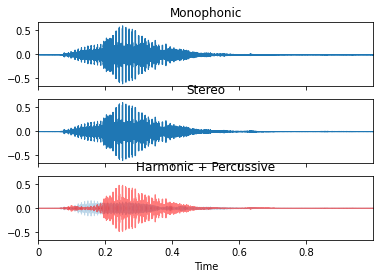

In [27]:
print(y, sr) # for nine

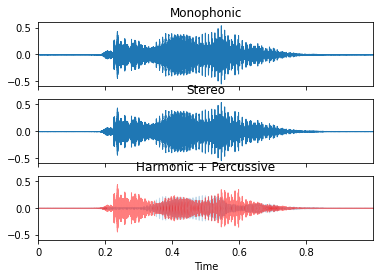

In [28]:
#for zero
path = '/data/test/zero/'
fileAudio = os.listdir(path)[0]
y, sr = librosa.load(path+os.listdir(path)[0])
print(y, sr)

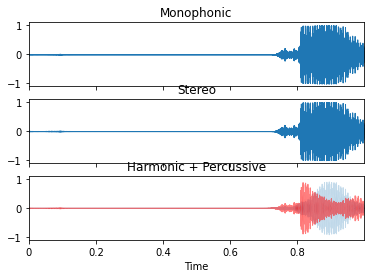

In [30]:
#for house
path = '/data/test/house/'
fileAudio = os.listdir(path)[0]
y, sr = librosa.load(path+os.listdir(path)[0])
print(y, sr)

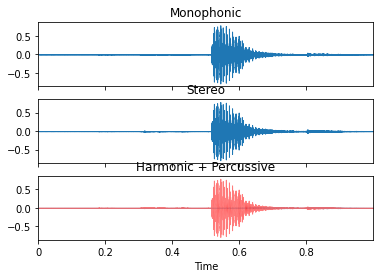

In [31]:
#for up
path = '/data/test/up/'
fileAudio = os.listdir(path)[0]
y, sr = librosa.load(path+os.listdir(path)[0])
print(y, sr)

In [8]:
# 
# Saving Data to numpy array
# 
# 
# convert file to wav2mfcc using the algorithm 
# Mel-frequency cepstral coefficients (MFCC)
def wav2mfcc(file_path, n_mfcc=20, max_len=44):
    wave, sr = librosa.load(file_path, mono=True)
    wave = np.asfortranarray(wave[::3])
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc


def save_data_to_array(path,labels, max_len=44, n_mfcc=20):
    #labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=max_len, n_mfcc=n_mfcc)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)

In [34]:
save_data_to_array(path,dataLabels)

In [35]:
#File is saved at '/content/drive/MyDrive/Colab Notebooks/data/'